# TP3: Detector de SPAM (17Co2024)
#### Integrantes
- Adassus, Luciano
- De Pedro Mermier, Ignacio
- Perez, José

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn nos ofrece una variedad ampliada de modelos Naive Bayes, para este problema usamos MultinomialNB que es pensado para este tipo de problemas
from sklearn.naive_bayes import MultinomialNB   
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, auc, roc_curve, ConfusionMatrixDisplay


## Tareas y preguntas a resolver:

### 1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?




In [7]:
# Leemos
dataset = pd.read_csv("dataset/spambase.csv")
dataset.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
5,0,0,0,0,1850,0,0,1850,0,0,...,0,0,0,0,223,0,0,0,0,1
6,0,0,0,0,1920,0,0,0,0,640,...,0,0,0,0,54,0,164,54,0,1
7,0,0,0,0,1880,0,0,1880,0,0,...,0,0,0,0,206,0,0,0,0,1
8,150,0,460,0,610,0,300,0,920,760,...,0,0,0,0,271,0,181,203,22,1
9,60,120,770,0,190,320,380,0,60,0,...,0,0,0,40,30,0,244,81,0,1


In [8]:
# Top 10 sin discriminar si es SPAM o no
column_sum = dataset.groupby(by="spam", as_index=False).sum().melt(id_vars=["spam"]).sort_values(ascending=False,by="value")
display(column_sum.head(10))


,spam,variable,value
37,1,word_freq_you,4105599
36,0,word_freq_you,3541702
52,0,word_freq_george,3527559
41,1,word_freq_your,2502597
48,0,word_freq_hp,2496576
22,0,word_freq_will,1495268
40,0,word_freq_your,1223098
50,0,word_freq_hpl,1204398
88,0,word_freq_re,1159138
23,1,word_freq_will,997100


In [9]:
# Top 10 separando por spam=0 y spam=1
df_no_spam_sorted = dataset[dataset["spam"]==0].groupby(by="spam", as_index=False).sum().melt(id_vars=["spam"]).sort_values(by="value",ascending=False).head(10)
df_spam_sorted = dataset[dataset["spam"]==1].groupby(by="spam", as_index=False).sum().melt(id_vars=["spam"]).sort_values(by="value",ascending=False).head(10)

# Pegamos un dataset a continuacion del otro para ver y comparar fácilmente:
df_no_spam_sorted = df_no_spam_sorted.reset_index(drop=True)
df_spam_sorted = df_spam_sorted.reset_index(drop=True)
result = pd.concat([df_no_spam_sorted, df_spam_sorted], axis=1)
display(result)


,spam,variable,value,spam,variable,value
0,0,word_freq_you,3541702,1,word_freq_you,4105599
1,0,word_freq_george,3527559,1,word_freq_your,2502597
2,0,word_freq_hp,2496576,1,word_freq_will,997100
3,0,word_freq_will,1495268,1,word_freq_free,939790
4,0,word_freq_your,1223098,1,word_freq_our,931799
5,0,word_freq_hpl,1204398,1,char_freq_!,931352
6,0,word_freq_re,1159138,1,word_freq_all,732080
7,0,word_freq_edu,800669,1,word_freq_mail,635470
8,0,word_freq_address,681569,1,word_freq_email,578759
9,0,word_freq_meeting,604460,1,word_freq_business,521250


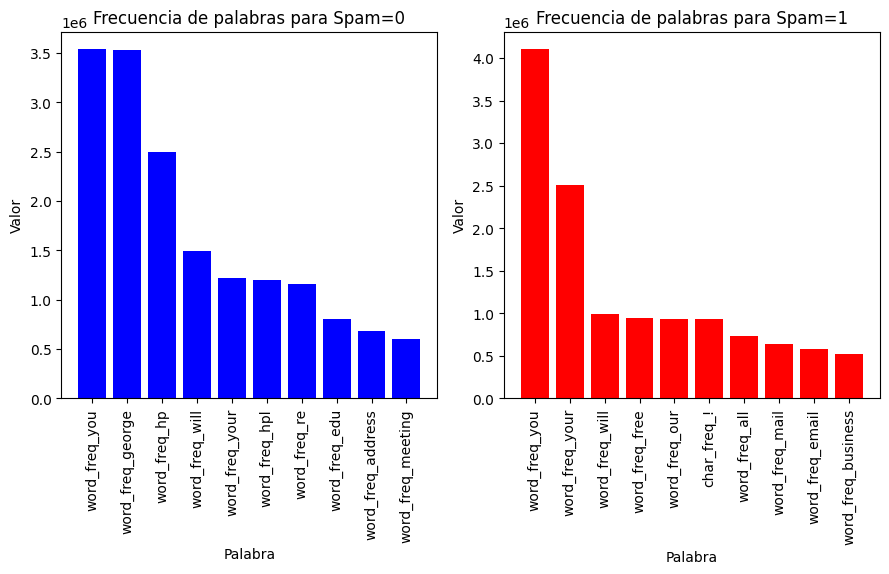

In [10]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(9,6))

# Plot para spam=0
axes[0].bar(df_no_spam_sorted['variable'], df_no_spam_sorted['value'], color='blue')
axes[0].set_title('Frecuencia de palabras para Spam=0')
axes[0].set_xlabel('Palabra')
axes[0].set_ylabel('Valor')
axes[0].tick_params(axis='x', rotation=90)

# Plot para spam=1
axes[1].bar(df_spam_sorted['variable'], df_spam_sorted['value'], color='red')
axes[1].set_title('Frecuencia de palabras para Spam=1')
axes[1].set_xlabel('Palabra')
axes[1].set_ylabel('Valor')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


Common Variables: ['word_freq_will', 'word_freq_your', 'word_freq_you']


,spam,variable,value,spam,variable,value
0,0,word_freq_george,3527559,1,word_freq_free,939790
1,0,word_freq_hp,2496576,1,word_freq_our,931799
2,0,word_freq_hpl,1204398,1,char_freq_!,931352
3,0,word_freq_re,1159138,1,word_freq_all,732080
4,0,word_freq_edu,800669,1,word_freq_mail,635470
5,0,word_freq_address,681569,1,word_freq_email,578759
6,0,word_freq_meeting,604460,1,word_freq_business,521250


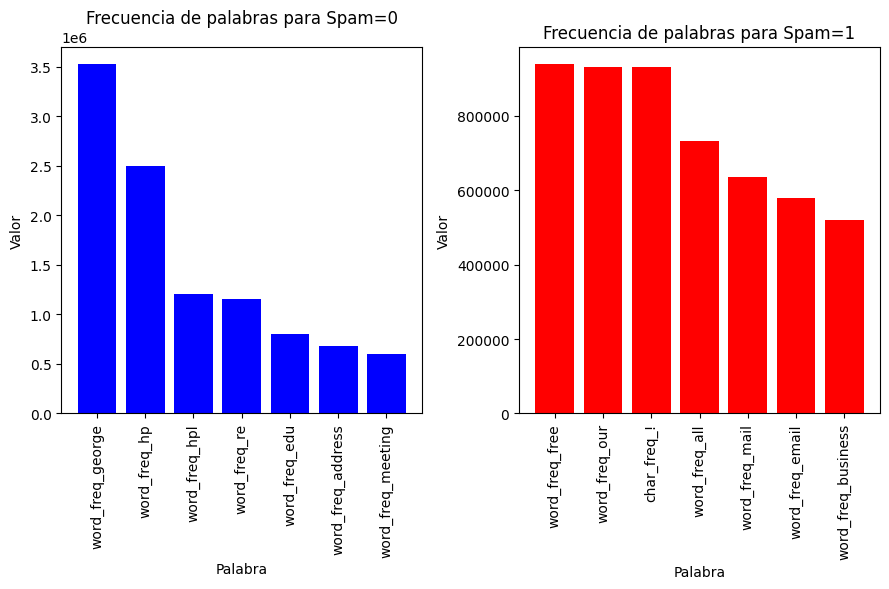

In [11]:
# **1. Find Common Variables**
no_spam_variables = df_no_spam_sorted['variable'].unique()
spam_variables = df_spam_sorted['variable'].unique()
common_variables = list(set(no_spam_variables).intersection(spam_variables))
# **2. Print Common Variables**
print("Common Variables:", common_variables)
# **3. Remove Common Variables**
df_no_spam_filtered = df_no_spam_sorted[~df_no_spam_sorted['variable'].isin(common_variables)].reset_index(drop=True)
df_spam_filtered = df_spam_sorted[~df_spam_sorted['variable'].isin(common_variables)].reset_index(drop=True)
result = pd.concat([df_no_spam_filtered, df_spam_filtered], axis=1)
display(result)


fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(9,6))

# Plot para spam=0
axes[0].bar(df_no_spam_filtered['variable'], df_no_spam_filtered['value'], color='blue')
axes[0].set_title('Frecuencia de palabras para Spam=0')
axes[0].set_xlabel('Palabra')
axes[0].set_ylabel('Valor')
axes[0].tick_params(axis='x', rotation=90)

# Plot para spam=1
axes[1].bar(df_spam_filtered['variable'], df_spam_filtered['value'], color='red')
axes[1].set_title('Frecuencia de palabras para Spam=1')
axes[1].set_xlabel('Palabra')
axes[1].set_ylabel('Valor')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

> Podemos observar que para ambos casos la palabra más utilizada en los mails es "you". También se comparten otras palabras con uso muy frecuente como "your" y "will".

Llaman la atención ciertas palabras en los mail de spam que como usuarios de cuentas de email, sin saber nada, ya nos activa cierto sentido de alarma como "free", "business" o el uso repetitivo del caracter "!".

Por parte de los mails de no spam pareciera ser que se encaran en cierto contexto, al repetirse palabras como "george", "hp" o "hpl".

ATS_2024_PARTIDO_3 2. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

In [12]:
# Obtenemos los atributos y target
X = (dataset.drop(columns="spam") * 100).astype(int)
#X = dataset2.drop(columns="spam")
y = dataset["spam"]
tst_size = 0.3
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = tst_size)

### 3. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

Entrenamos el modelo

In [13]:
# Scikit-learn informa que el clasificar MultinomialNB es muy util para estos casos donde la información esta en la frecuencia de las palabras
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,y_train)

MultinomialNB()

Comparamos valores predichos contra los valores reales.

In [14]:
y_pred_naive = nb_classifier.predict(X_test)
columns = ["y_pred","y_test","result"]
xor = ~np.logical_xor(y_pred_naive,y_test)
compare_results = np.column_stack((y_pred_naive.reshape(-1,1),np.array(y_test).reshape(-1,1),xor))
df_results = pd.DataFrame(data=compare_results, columns = columns)
display(df_results)
print(f"Porcentaje de muestras bien clasificadas: {(nb_classifier.score(X_test, y_test)*100):.3f}%")


,y_pred,y_test,result
0,1,1,1
1,0,0,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
1376,1,1,1
1377,1,1,1
1378,1,1,1
1379,0,0,1


Porcentaje de muestras bien clasificadas: 85.952%


Analizamos la matriz de confusión del modelo y sus parámetros característicos: sensibilidad, especificidad, exactitud balanceada, precisión, recuperación, F1-score y tamaño en memoria del dataset de entrada (X). 

Sensibilidad: 0.9511278195488722
Especificidad: 0.8021201413427562
Exactitud balanceada: 0.8766239804458142
Precision: 0.7507418397626113
Recuperación: 0.9511278195488722
F1-score: 0.8391376451077943
X DataFrame size: 1987764 bytes


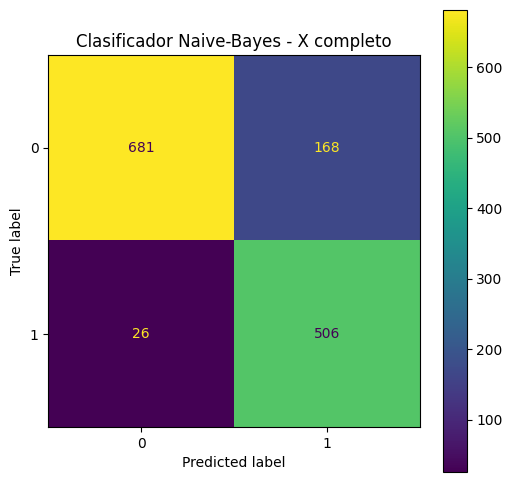

In [15]:
y_pred_test_nb = nb_classifier.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_test_nb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb,
                              display_labels=nb_classifier.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Naive-Bayes - X completo")

# Midamos la sensibilidad y especificidad
P = np.sum(cm_nb[1, :]) # Total 1
N = np.sum(cm_nb[0, :]) # Total 0
TP = cm_nb[1, 1] # Total bien estimados 1
TN = cm_nb[0, 0] # Total bien estimados 0
TPR = TP/P
TNR = TN/N

print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred_test_nb, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred_test_nb, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred_test_nb, zero_division=0)}")
print(f"X DataFrame size: {X.memory_usage(deep=True).sum()} bytes")

(3220, 51) (1381,)
Porcentaje de muestras bien clasificadas: 90.080%
Sensibilidad: 0.9650092081031307
Especificidad: 0.8591885441527446
Exactitud balanceada: 0.9120988761279376
Precision: 0.8161993769470405
Recuperación: 0.9650092081031307
F1-score: 0.8843881856540085
X DataFrame size: 1877340 bytes


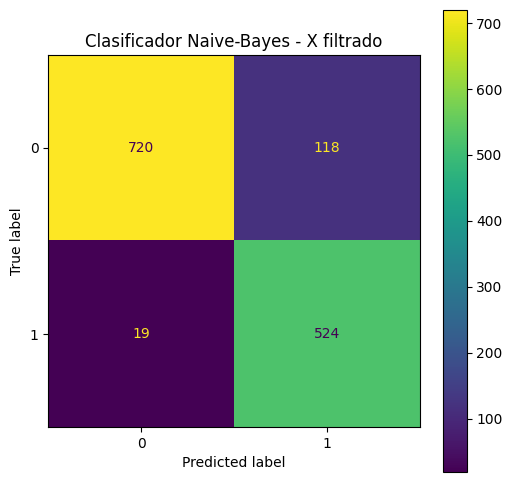

In [16]:
# Probamos con menor cantidad de datos de X: sin las palabras que son muy utilizadas en ambos casos (SPAM y no SPAM)
X_rep = (dataset.drop(columns=["spam","word_freq_you","word_freq_your","word_freq_will"]) * 100).astype(int)
y_rep = dataset["spam"]

tst_size = 0.3
X_train, X_test, y_train, y_test= train_test_split(X_rep, y_rep, test_size = tst_size)
print(X_train.shape,y_test.shape)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,y_train)
print(f"Porcentaje de muestras bien clasificadas: {(nb_classifier.score(X_test, y_test)*100):.3f}%")

y_pred_test_nb = nb_classifier.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_test_nb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb,
                              display_labels=nb_classifier.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Naive-Bayes - X filtrado")

# Midamos la sensibilidad y especificidad
P = np.sum(cm_nb[1, :]) # Total 1
N = np.sum(cm_nb[0, :]) # Total 0
TP = cm_nb[1, 1] # Total bien estimados 1
TN = cm_nb[0, 0] # Total bien estimados 0
TPR = TP/P
TNR = TN/N

print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred_test_nb, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred_test_nb, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred_test_nb, zero_division=0)}")
print(f"X DataFrame size: {X_rep.memory_usage(deep=True).sum()} bytes")


(3220, 52) (1381,)
Porcentaje de muestras bien clasificadas: 85.083%
Sensibilidad: 0.9394495412844037
Especificidad: 0.7930622009569378
Exactitud balanceada: 0.8662558711206707
Precision: 0.7474452554744525
Recuperación: 0.9394495412844037
F1-score: 0.832520325203252
X DataFrame size: 1914148 bytes


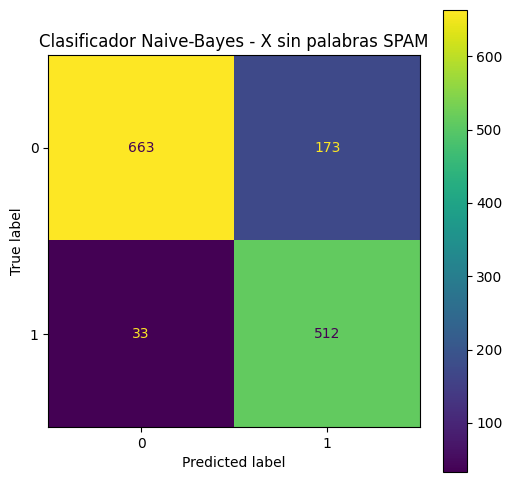

In [17]:
# Probamos con menor cantidad de datos de X: sin las palabras que son muy utilizadas en caso SPAM

drop_columns = [
                "word_freq_free","word_freq_our","char_freq_!"
                ]
X_spam = (dataset.drop(columns=drop_columns) * 100).astype(int)
y_spam = dataset["spam"]

tst_size = 0.3
X_train, X_test, y_train, y_test= train_test_split(X_spam, y_spam, test_size = tst_size)
print(X_train.shape,y_test.shape)

naive_classifier = MultinomialNB()
naive_classifier.fit(X_train,y_train)

print(f"Porcentaje de muestras bien clasificadas: {(naive_classifier.score(X_test, y_test)*100):.3f}%")

y_pred_test_nb = naive_classifier.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_test_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb,
                              display_labels=naive_classifier.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Naive-Bayes - X sin palabras SPAM")

# Midamos la sensibilidad y especificidad

P = np.sum(cm_nb[1, :]) # Total 1
N = np.sum(cm_nb[0, :]) # Total 0
TP = cm_nb[1, 1] # Total bien estimados 1
TN = cm_nb[0, 0] # Total bien estimados 0
TPR = TP/P
TNR = TN/N

print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred_test_nb, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred_test_nb, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred_test_nb, zero_division=0)}")
print(f"X DataFrame size: {X_spam.memory_usage(deep=True).sum()} bytes")

Porcentaje de muestras bien clasificadas: 87.690%
Sensibilidad: 0.9659284497444633
Especificidad: 0.8110831234256927
Exactitud balanceada: 0.8885057865850781
Precision: 0.7907949790794979
Recuperación: 0.9659284497444633
F1-score: 0.8696319018404908
X DataFrame size: 1914148 bytes


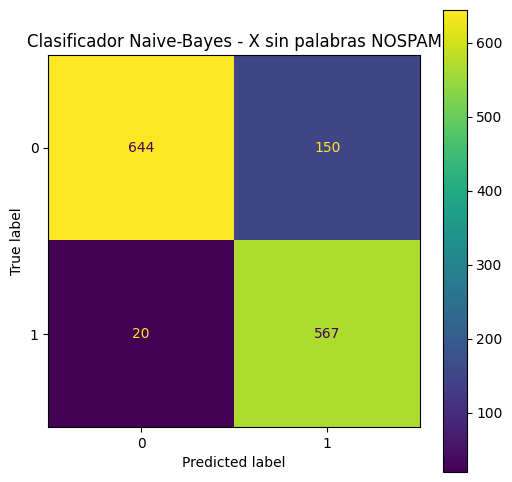

In [18]:
# Probamos con menor cantidad de datos de X
drop_columns = [
               
                "word_freq_george","word_freq_hp","word_freq_hpl"
                ]
X_nospam = (dataset.drop(columns=drop_columns) * 100).astype(int)
y_nospam = dataset["spam"]

tst_size = 0.3
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = tst_size)

# Scikit-learn nos ofrece una variedad ampliada de modelos Naive Bayes, para este problema usamos MultinomialNB que es pensado para este tipo de problemas
naive_classifier = MultinomialNB()
naive_classifier.fit(X_train,y_train)

print(f"Porcentaje de muestras bien clasificadas: {(naive_classifier.score(X_test, y_test)*100):.3f}%")

y_pred_test_nb = naive_classifier.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_test_nb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb,
                              display_labels=naive_classifier.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Naive-Bayes - X sin palabras NOSPAM")

# Midamos la sensibilidad y especificidad
P = np.sum(cm_nb[1, :]) # Total 1
N = np.sum(cm_nb[0, :]) # Total 0
TP = cm_nb[1, 1] # Total bien estimados 1
TN = cm_nb[0, 0] # Total bien estimados 0
TPR = TP/P
TNR = TN/N

print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred_test_nb, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred_test_nb, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred_test_nb, zero_division=0)}")
print(f"X DataFrame size: {X_nospam.memory_usage(deep=True).sum()} bytes")

Porcentaje de muestras bien clasificadas: 83.780%
Naive-Bayes
Sensibilidad: 0.9070208728652751
Especificidad: 0.7950819672131147
Exactitud balanceada: 0.851051420039195
Precision: 0.7320061255742726
Recuperación: 0.9070208728652751
F1-score: 0.8101694915254237
X DataFrame size: 552252 bytes


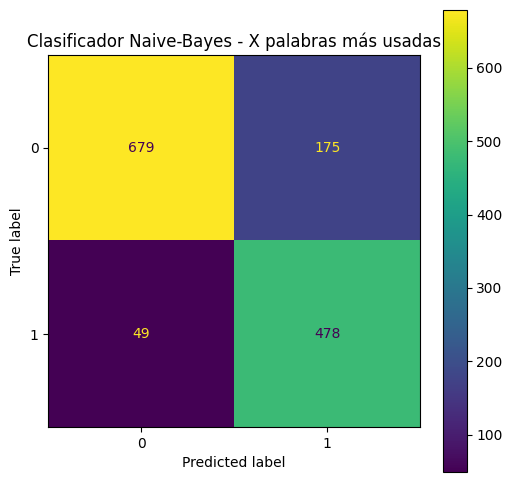

In [19]:
# Utilizamos unicamente las 14 palabras mas usadas en SPAM y no SPAM sin repeticion

X_filter = dataset[['word_freq_george','word_freq_hp','word_freq_hpl','word_freq_re','word_freq_re','word_freq_edu','word_freq_address','word_freq_meeting',
             'word_freq_free','word_freq_our','char_freq_!','word_freq_all','word_freq_mail','word_freq_email','word_freq_business']]

y_filter = dataset["spam"]
tst_size = 0.3
X_train, X_test, y_train, y_test= train_test_split(X_filter, y_filter, test_size = tst_size)

naive_classifier = MultinomialNB()
naive_classifier.fit(X_train,y_train)

print(f"Porcentaje de muestras bien clasificadas: {(naive_classifier.score(X_test, y_test)*100):.3f}%")

y_pred_test_nb = naive_classifier.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_test_nb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb,
                              display_labels=naive_classifier.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Naive-Bayes - X palabras más usadas")

# Midamos la sensibilidad y especificidad
print("Naive-Bayes")
P = np.sum(cm_nb[1, :]) # Total 1
N = np.sum(cm_nb[0, :]) # Total 0
TP = cm_nb[1, 1] # Total bien estimados 1
TN = cm_nb[0, 0] # Total bien estimados 0
TPR = TP/P
TNR = TN/N

print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred_test_nb, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred_test_nb, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred_test_nb, zero_division=0)}")
print(f"X DataFrame size: {X_filter.memory_usage(deep=True).sum()} bytes")

Se observa que el modelo principal, con todos los datos de entrada tiene un procentaje de muestras bien clasificadas del 87% aproximadamente. Al observar la matriz de confusión, concluimos que el clasificador posee errores, de los cuales la mayoría son falsos positivos, lo cual no es muy útil ya que nosotros preferimos no detectar un SPAM a mandar un mail importante a SPAM.

Al utilizar distintos datasets de entradas con menor cantidad de columnas: sin las palabras más usadas en ambos casos, sin las palabras más usadas solamente para SPAM, sin las palabras más usadas para NO SPAM y solamente con las palabras más usadas en ambos casos; podemos observar que en lineas generales el modelo no modifica mucho sus valores, tantos los de 'score' como la matriz de confusión y sus parámetros característicos. Sin embargo, el uso de memoria si mejora, sobre todo para el último caso, el cual utiliza únicamente las palabras mas usadas para SPAM y no SPAM, que, a pesar de tener mayor cantidad de falsos negativos, la cantidad de falsos positivos no cambia y utiliza un dataset con la mitad de memoria (500 kB aproximadamente).



### 4. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).

Primero, vamos a cargar el dataset y separar las características (`X`) y las etiquetas (`y`). Luego, dividiremos los datos en un conjunto de entrenamiento y otro de prueba. Antes de entrenar el modelo, normalizaremos los datos para asegurar que todas las características estén en la misma escala.

Después de entrenar el modelo, evaluaremos brevemente su rendimiento inicial antes de pasar al análisis detallado.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings

# Silenciar la advertencia
warnings.filterwarnings("ignore", category=UserWarning, message="X has feature names, but LogisticRegression was fitted without feature names")

# Cargar el dataset
df = pd.read_csv('dataset/spambase.csv')

# Separar las características y la etiqueta
X = df.drop('spam', axis=1)
y = df['spam']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Regresión Logística
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento inicial del modelo
accuracy = model.score(X_test_scaled, y_test)
print(f"porcetaje de precisión : {accuracy * 100}")

porcetaje de precisión : 91.74511223750905


**Conclusión del Entrenamiento:**

El modelo de Regresión Logística, después de ser entrenado y evaluado en el conjunto de prueba, se muestra arriba un porcentaje de precisión inicial. Esto indica que el modelo está bien ajustado para la tarea, pero se requiere un análisis más profundo para entender mejor cómo maneja los errores de clasificación.

### 5. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?

La matriz de confusión nos permite visualizar el rendimiento del modelo, mostrando la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. A partir de esta matriz, podremos identificar qué tipo de error es más común.

A continuación, calcularemos la matriz de confusión y analizaremos los tipos de errores que comete el modelo.

In [21]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[715, 122],
       [ 21, 523]])


**Análisis de la Matriz de Confusión:**

Para interpretar la matriz de confusión:
\begin{bmatrix}
\text{TN} & \text{FP} \\
\text{FN} & \text{TP} \\
\end{bmatrix}

- **Verdaderos Positivos (TP):** Cantidad de correos que eran SPAM y fueron correctamente clasificados como SPAM.
- **Falsos Positivos (FP):** Cantidad de correos que no eran SPAM pero fueron incorrectamente clasificados como SPAM.
- **Verdaderos Negativos (TN):** Cantidad de correos que no eran SPAM y fueron correctamente clasificados.
- **Falsos Negativos (FN):** Cantidad de correos que eran SPAM pero fueron incorrectamente clasificados como no SPAM.

En el caso del modelo de Regresión Logística, observamos que:
- **Falsos Positivos (FP):** El modelo clasifica algunos correos legítimos como SPAM. Esto es menos crítico, pero puede causar inconvenientes si correos importantes son marcados incorrectamente.
- **Falsos Negativos (FN):** El modelo falla al identificar algunos correos SPAM, permitiendo que lleguen a la bandeja de entrada del usuario.

**Importancia de los Errores:**

En el contexto de detección de SPAM, es generalmente más importante minimizar los **falsos negativos** (FN) porque queremos asegurarnos de que la menor cantidad posible de correos SPAM lleguen a la bandeja de entrada. Sin embargo, también es importante no generar demasiados **falsos positivos** (FP), ya que esto podría resultar en la pérdida de correos legítimos.

### 6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior?.

La **precisión** mide la proporción de predicciones positivas correctas, mientras que la **recuperación** mide la proporción de verdaderos positivos correctamente identificados. Estas métricas nos ayudarán a entender mejor el rendimiento del modelo en relación con los diferentes tipos de errores.

In [22]:
from sklearn.metrics import precision_score, recall_score

# Calcular precisión y recuperación
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

precision, recall

(0.8108527131782945, 0.9613970588235294)

**Análisis de Precisión y Recuperación:**

- **Precisión:** Indica la proporción de correos clasificados como SPAM que realmente son SPAM. En este caso, la precisión obtenida es de **0.81**. Esto significa que el 81% de los correos que el modelo identificó como SPAM realmente lo eran.

- **Recuperación:** Indica la proporción de correos SPAM que fueron correctamente clasificados. La recuperación obtenida es de **0.96**. Esto significa que el 96% de los correos que eran realmente SPAM fueron correctamente identificados como tal por el modelo.

**Relación con la Matriz de Confusión:**

- Una alta precisión significa que hay relativamente pocos **falsos positivos** (correos no SPAM identificados como SPAM). Esto es importante en aplicaciones donde clasificar incorrectamente un correo legítimo como SPAM tiene un costo significativo (por ejemplo, pérdida de correos importantes).

- Una alta recuperación significa que hay relativamente pocos **falsos negativos** (correos SPAM que no son identificados como tales). Esto es crucial en aplicaciones donde es importante capturar la mayor cantidad de SPAM posible, incluso a riesgo de marcar algunos correos legítimos como SPAM.

En este problema, dado que queremos minimizar la cantidad de correos SPAM que llegan a la bandeja de entrada, la **recuperación** es particularmente importante. Sin embargo, la **precisión** no debe ser demasiado baja, ya que esto podría resultar en demasiados correos legítimos siendo filtrados como SPAM.

En resumen, el modelo de Regresión Logística tiene una buena recuperación, lo que es crucial en el contexto de detección de SPAM, pero también mantiene una precisión razonable para evitar un exceso de falsos positivos.
    

### 7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

La **curva ROC** (Receiver Operating Characteristic) es una herramienta gráfica para evaluar la capacidad de un modelo para distinguir entre clases. El **AUC** (Área Bajo la Curva ROC) mide el desempeño del modelo en esta tarea: cuanto mayor sea el AUC, mejor es el modelo para discriminar entre clases.

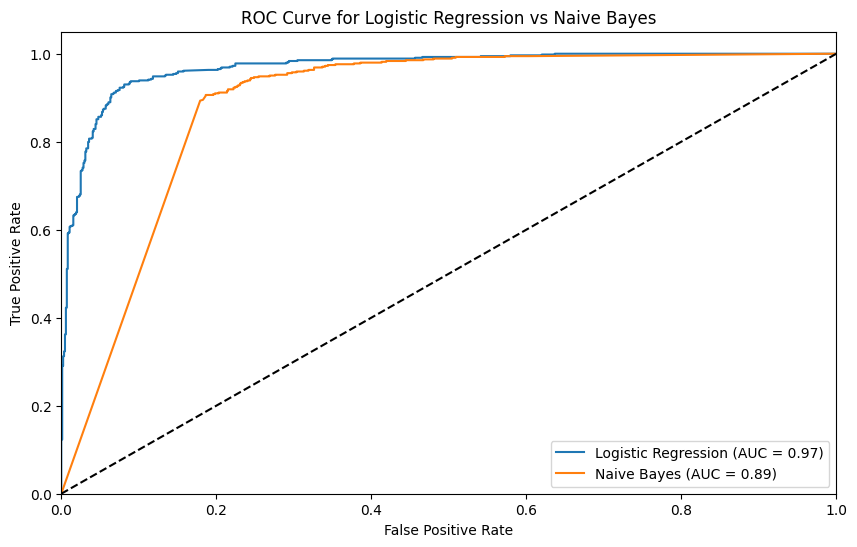

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Entrenar el modelo de Bayes Ingenuo
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Realizar predicciones
nb_y_prob = nb_model.predict_proba(X_test_scaled)[:, 1]

# Calcular curva ROC y AUC para Regresión Logística
log_y_prob = model.predict_proba(X_test_scaled)[:, 1]
log_fpr, log_tpr, _ = roc_curve(y_test, log_y_prob)
log_auc = roc_auc_score(y_test, log_y_prob)

# Calcular curva ROC y AUC para Bayes Ingenuo
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_y_prob)
nb_auc = roc_auc_score(y_test, nb_y_prob)

# Graficar las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression vs Naive Bayes')
plt.legend(loc="lower right")
plt.show()

**Conclusiones:**

Al comparar ambos modelos, podemos observar lo siguiente:

- **Regresión Logística**: El modelo de Regresión Logística tiene un AUC de 0.97. Esto indica que el modelo tiene una buena capacidad para discriminar entre correos SPAM y no SPAM. La curva ROC muestra un buen balance entre la tasa de verdaderos positivos y la tasa de falsos positivos.

- **Naive Bayes**: El modelo de Bayes Ingenuo tiene un AUC de 0.89. Si bien también tiene una capacidad razonable para discriminar entre clases, generalmente el AUC de Bayes Ingenuo es menor que el de Regresión Logística, lo que sugiere que la Regresión Logística puede ser un mejor modelo para este conjunto de datos.

En resumen, la Regresión Logística parece ser el modelo más adecuado para esta tarea, basado en el análisis de la curva ROC y el AUC. Sin embargo, ambos modelos ofrecen un rendimiento razonable y podrían ser útiles dependiendo del contexto específico.